### Урок 2. Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [13]:
# -- ВАШ КОД ТУТ
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

data = pd.read_csv('data/non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

degree=1, ошибка валидации=0.269, ошибка обучения=0.318
degree=2, ошибка валидации=0.253, ошибка обучения=0.314
degree=3, ошибка валидации=0.071, ошибка обучения=0.1
degree=4, ошибка валидации=0.064, ошибка обучения=0.106
degree=5, ошибка валидации=0.068, ошибка обучения=0.082
degree=6, ошибка валидации=0.071, ошибка обучения=0.084
degree=7, ошибка валидации=0.071, ошибка обучения=0.068
degree=8, ошибка валидации=0.079, ошибка обучения=0.07


Text(0.5, 1.0, 'Коэффициенты ошибок для метода Ridge')

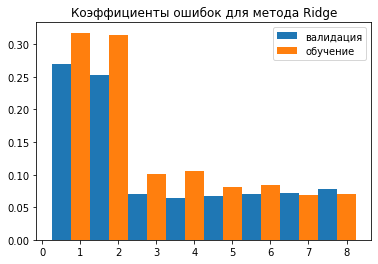

In [15]:
# Изучаем метод Ridge
coef = []
for i in range(1, 8+1):
    degree = i
    X = generate_degrees(data['x_train'], degree)
    y = data.y_train.values
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = Ridge(alpha=0.8).fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    v_mse = mean_squared_error(y_valid, y_pred)
    t_mse = mean_squared_error(y_train, y_pred_train)
    print(f'degree={degree}, ошибка валидации={round(v_mse, 3)}, ошибка обучения={round(t_mse, 3)}')
    coef.append([v_mse, t_mse])
    # print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
    # print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))
coef_r = np.array(coef)
# print(coef_r)

# Построение графиков ошибок
plt.bar(np.arange(0.5, 8.5, 1), coef_r[:,0], width=0.5, label='валидация')
plt.bar(np.arange(1, 9, 1), coef_r[:,1], width=0.5, label='обучение')
plt.legend()
plt.title('Коэффициенты ошибок для метода Ridge')
# plt.grid()

degree=1, ошибка валидации=0.27, ошибка обучения=0.318
degree=2, ошибка валидации=0.256, ошибка обучения=0.315
degree=3, ошибка валидации=0.062, ошибка обучения=0.088
degree=4, ошибка валидации=0.058, ошибка обучения=0.093
degree=5, ошибка валидации=0.06, ошибка обучения=0.098
degree=6, ошибка валидации=0.061, ошибка обучения=0.094
degree=7, ошибка валидации=0.061, ошибка обучения=0.088
degree=8, ошибка валидации=0.062, ошибка обучения=0.085


Text(0.5, 1.0, 'Коэффициенты ошибок для метода Lasso')

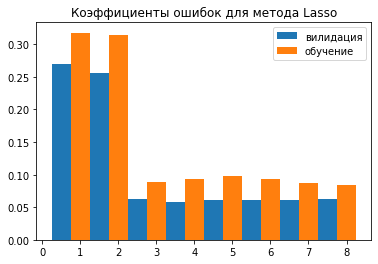

In [16]:
# Изучаем метод Lasso
coef = []
for i in range(1, 8+1):
    degree = i
    X = generate_degrees(data['x_train'], degree)
    y = data.y_train.values
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = Lasso(alpha=0.01).fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    v_mse = mean_squared_error(y_valid, y_pred)
    t_mse = mean_squared_error(y_train, y_pred_train)
    print(f'degree={degree}, ошибка валидации={round(v_mse, 3)}, ошибка обучения={round(t_mse, 3)}')
    coef.append([v_mse, t_mse])
    # print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
    # print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))
coef_r = np.array(coef)
# print(coef_r)

# Построение графиков ошибок
plt.bar(np.arange(0.5, 8.5, 1), coef_r[:,0], width=0.5, label='вилидация')
plt.bar(np.arange(1, 9, 1), coef_r[:,1], width=0.5, label='обучение')
plt.legend()
plt.title('Коэффициенты ошибок для метода Lasso')
# plt.grid()

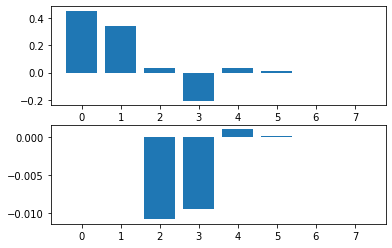

In [17]:
degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model_ridge = Ridge(alpha=0.8).fit(X_train, y_train)
model_lasso = Lasso(alpha=0.8).fit(X_train, y_train)
plt.figure()
plt.subplot(211)
plt.bar(range(degree), model_ridge.coef_)
plt.subplot(212)
plt.bar(range(degree), model_lasso.coef_)
plt.show()

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!